# РК ИУ5

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
data.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

In [5]:
data.isnull().sum()
# проверим есть ли пропущенные значения

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [8]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Crossing']])

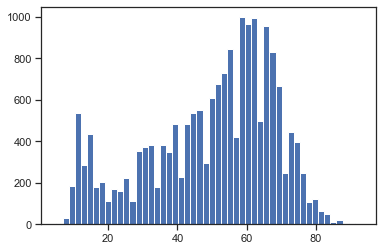

In [9]:
plt.hist(data['Crossing'], 50)
plt.show()

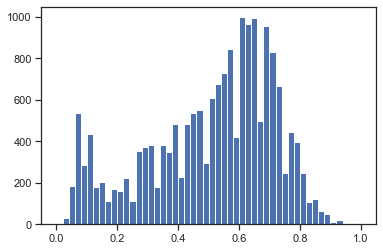

In [10]:
plt.hist(sc1_data, 50)
plt.show()

### Масштабирование данных на основе Z-оценки - StandardScaler¶

In [11]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Crossing']])

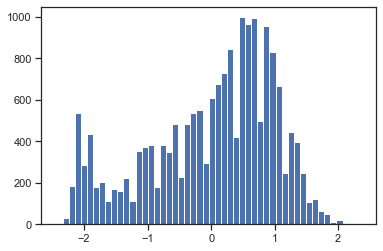

In [12]:
plt.hist(sc2_data, 50)
plt.show()

In [13]:
cat_temp_data = data[['Club']]
cat_temp_data.head()

,Club
0,FC Barcelona
1,Juventus
2,Paris Saint-Germain
3,Manchester United
4,Manchester City


In [14]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['FC Barcelona'],
       ['Juventus'],
       ['Paris Saint-Germain'],
       ...,
       ['Cambridge United'],
       ['Tranmere Rovers'],
       ['Tranmere Rovers']], dtype=object)

In [15]:
cat_enc = pd.DataFrame({'Club':data_imp2.T[0]})
cat_enc

,Club
0,FC Barcelona
1,Juventus
2,Paris Saint-Germain
3,Manchester United
4,Manchester City
...,...
18202,Crewe Alexandra
18203,Trelleborgs FF
18204,Cambridge United
18205,Tranmere Rovers


In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### Кодирование категорий целочисленными значениями - label encoding

In [17]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['Club'])

In [18]:
cat_enc['Club'].unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma',
       'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'FC Porto',
       'FC Schalke 04', 'Beşiktaş JK', 'LA Galaxy', 'Sporting CP',
       'Real Betis', 'Olympique de Marseille', 'RC Celta',
       'Bayer 04 Leverkusen', 'Real Sociedad', 'Villarreal CF',
       'Sevilla FC', 'SL Benfica', 'AS Saint-Étienne', 'AS Monaco',
       'Leicester City', 'Atalanta', 'Grêmio', 'Atlético Mineiro',
       'RB Leipzig', 'Ajax', 'Dalian YiFang FC', 'Everton',
       'West Ham United', '1. FC Köln', 'TSG 1899 Hoffenheim',
       'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr',
       'Wolverhampton Wanderers', 'Borussia Mönchengladbach',
       'Hertha BSC', 'SV Werder

In [19]:
np.unique(cat_enc_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [20]:
le.inverse_transform([0, 1, 2, 3])

array([' SSV Jahn Regensburg', '1. FC Heidenheim 1846',
       '1. FC Kaiserslautern', '1. FC Köln'], dtype=object)

### Кодирование категорий наборами бинарных значений - one-hot encoding

In [21]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['Club']])

In [22]:
cat_enc.shape

(18207, 1)

In [23]:
cat_enc_ohe.shape

(18207, 651)

In [24]:
cat_enc_ohe

<18207x651 sparse matrix of type '<class 'numpy.float64'>'
	with 18207 stored elements in Compressed Sparse Row format>

In [25]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
cat_enc.head(10)

,Club
0,FC Barcelona
1,Juventus
2,Paris Saint-Germain
3,Manchester United
4,Manchester City
5,Chelsea
6,Real Madrid
7,FC Barcelona
8,Real Madrid
9,Atlético Madrid


### Ящик с усами 

<AxesSubplot:xlabel='Age'>

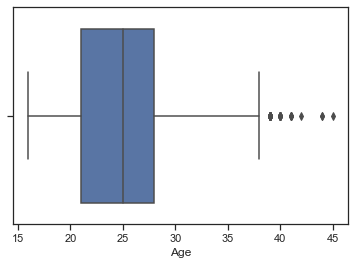

In [27]:
sns.boxplot(data['Age'])